In [1]:
### PSTH of neurons in regards to specific behaviors

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import import_ipynb
import func_format
import func_analysis
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib.gridspec as gridspec
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

importing Jupyter notebook from func_format.ipynb
importing Jupyter notebook from func_analysis.ipynb


In [2]:
def subplot_PSTH(locationx, locationy, title, averagetrace, psthrawvalues, color):

    ax0 = fig.add_subplot(specs[locationx, locationy])
    
    ax0.bar(np.arange(0, 39), averagetrace, width = 1, color = color)
    #ax0.plot(averagetrace, lw = 1, color = color)
    ax0.set_xlim(0, 39)
    ax0.set_xticks([])
    ax0.grid(False)

    ax1 = fig.add_subplot(specs[locationx+1:locationx+3, locationy])
    ax1.imshow(psthrawvalues, aspect = 'auto', cmap = 'binary', vmin = 0, vmax = 1)
    ax1.set_xlim(0, 800)
    ax1.set_yticks([])
    ax1.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax1.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax1.set_ylabel('Trial #')

    ax0.set_title(title, fontsize = 8)
    ax1.grid(False)
    
    return(ax0, ax1)

def subplot_PSTH2(locationx, locationy, title, averagetrace, psthrawvalues, randtrace):

    ax0 = fig.add_subplot(specs[locationx:locationx+2, locationy])
    
    ax0.plot(randtrace, lw = 1, color = 'black')
    #ax0.fill_between(np.arange(0, len(randsem)), randtrace+randsem, randtrace-randsem, alpha = 0.5, color = 'grey')
    
    ax0.plot(averagetrace, lw = 1, color = 'firebrick')
    #ax0.fill_between(np.arange(0, len(responsesem)), averagetrace+responsesem, averagetrace-responsesem, alpha = 0.5, color = 'lightcoral')
    ax0.set_xlim(0, 99)
    ax0.set_xticks([])
    ax0.grid(False)

    ax1 = fig.add_subplot(specs[locationx+2:locationx+4, locationy])
    ax1.imshow(psthrawvalues, aspect = 'auto', cmap = 'binary', vmin = 0, vmax = 1)
    ax1.set_xlim(0, 800)
    ax1.set_yticks([])
    ax1.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax1.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax1.set_ylabel('Trial #')

    ax0.set_title(title, fontsize = 8)
    ax1.grid(False)
    
    return(ax0, ax1)

def subplot_PSTH3(locationx, locationy, title, averagetrace, psthrawvalues, responsesem, randtrace, randsem):

    ax0 = fig.add_subplot(specs[locationx:locationx+2, locationy])
    
    ax0.plot(randtrace, lw = 1, color = 'black')
    ax0.fill_between(np.arange(0, len(randsem)), randtrace+randsem, randtrace-randsem, alpha = 0.5, color = 'grey')
    
    ax0.plot(averagetrace, lw = 1, color = 'darkblue')
    ax0.fill_between(np.arange(0, len(responsesem)), averagetrace+responsesem, averagetrace-responsesem, alpha = 0.5, color = 'cornflowerblue')
    ax0.set_xlim(0, 2000)
    ax0.set_xticks([])
    ax0.grid(False)

    ax1 = fig.add_subplot(specs[locationx+2:locationx+4, locationy])
    ax1.imshow(psthrawvalues, aspect = 'auto', cmap = 'binary', vmin = 0, vmax = 1)
    ax1.set_xlim(0, 800)
    ax1.set_yticks([])
    ax1.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax1.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax1.set_ylabel('Trial #')

    ax0.set_title(title, fontsize = 8)
    ax1.grid(False)
    
    return(ax0, ax1)

def extractusableint(modality, intcat, foldername):
    if modality == 'female':
        usableint = np.ravel(foldername)[np.ravel(intcat) == 'Female']
    elif modality == 'male':
        usableint = np.ravel(foldername)[np.ravel(intcat) == 'Male']
    elif modality == 'social' or modality == 'panresponsive':
        usableint = np.ravel(foldername)[np.ravel(intcat) == 'Male']
        usableint = np.append(usableint, np.ravel(foldername)[np.ravel(intcat) == 'Female'])
    
    return(usableint)

100A completed...
101A completed...
102A completed...
103A completed...
104A completed...
106A completed...
107A completed...
111A completed...
113A completed...
113B completed...
114A completed...
114B completed...
115A completed...
115B completed...
116A completed...
117A completed...
120A completed...
122A completed...
122B completed...
125A completed...
126A completed...
126B completed...
126C completed...
127A completed...
128A completed...
12A completed...
130A completed...
130B completed...
131A completed...
131B completed...
132A completed...
132B completed...
132C completed...
133A completed...
135A completed...
135B completed...
136A completed...
138A completed...
139A completed...
147A completed...
147B completed...
14A completed...
14B completed...
15A completed...
162A completed...
164A completed...
166A completed...
166B completed...
168A completed...
168B completed...
169A completed...
16A completed...
170A completed...
170B completed...
170C completed...
170D completed.

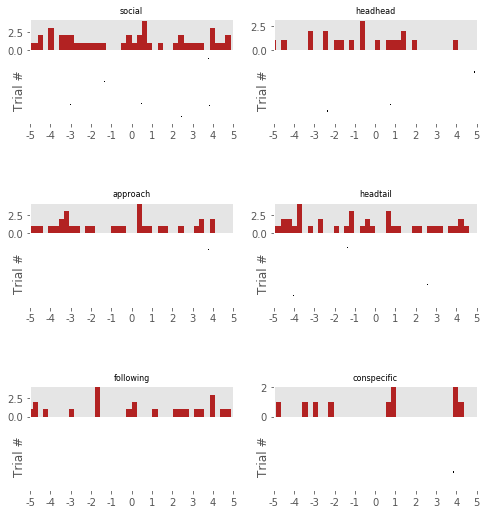

In [7]:
### plot 1 plot per neuron - firing increases ONLY

drive = 'F:/'
ratID = ['Amygdala6',
         'Amygdala8',
         'Amygdala10',
         'Amygdala11']
date = ['13042019',
        '01102019',
        '27062020',
        '06072020']

for r, rat in enumerate(ratID):
    behaviorpath = drive+rat+'/TrackingData/AutoBehavior_06112020/'+date[r]+'/'
    configpath = drive+rat+'/Parameters_'+date[r]+'.yml'
    neuronpath = drive+rat+'/Electrophys/'+date[r]+'/SpikeTimes/Neurons_BLA/'
    savepath = drive+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'
    neuronprofile = np.loadtxt('F:/ResponseType/ResponseType_BLAday1_4rats/responseprofile.csv', delimiter = ',', dtype = str)
    neuronprofile = neuronprofile[neuronprofile[:,1] == date[r]]
    #sigpath = drive+rat+'/Analyses/'+date[r]+'/ROC_allbase/significance.csv'
    
    [foldername, inttype, intcat, presentationNum, videosync_start, videosync_stop, framerate, framestouse, intsync_start, intsync_stop] = func_format.openconfig(configpath)
    func_format.foldercheck(savepath)

    behaviorlist = ['social', 'approach', 'following', 'headhead', 'headtail', 'conspecific']
    xindex = [0,5,10,0,5,10]
    yindex = [0,0,0,1,1,1]
    
    #sig = np.loadtxt(sigpath, delimiter = ',', dtype = str)
    
    for n, neuron in enumerate(os.listdir(neuronpath)):
        if neuron[-4:] != '.npy':
            continue
        neuroninfo = np.ravel(neuronprofile[neuronprofile[:,2] == neuron[:-4]])
        modality = neuroninfo[4]
        
        if neuroninfo[3] == 'NoResponses' or neuroninfo[3] == 'Inhibition' or neuroninfo[4] == 'nonsocial' or neuroninfo[4] == 'food' or neuroninfo[4] == 'object':
            modality = 'panresponsive'
        #if neuroninfo[3] == 'NoResponses' or neuroninfo[3] == 'Inhibition' or neuroninfo[4] == 'nonsocial' or neuroninfo[4] == 'food' or neuroninfo[4] == 'object':
            #continue
        
        usableint = extractusableint(modality, intcat, foldername)
        #usableint = foldername
        calculateaveragetrace = False
        plt.close()
        fig = plt.figure(figsize = (8, 10), constrained_layout = False)
        specs = gridspec.GridSpec(ncols = 2, nrows = 15, figure = fig)
        
        spikes = np.load(neuronpath+neuron)/1000
        neuronname = neuron[:-4]
        
        averagetracesave = np.zeros(len(np.arange(-5, 5, .25)))
        randtracesave = np.zeros(len(np.arange(-5, 5, .25)))
        
        for b, behavior in enumerate(behaviorlist):
            
            psthrawvalues = np.zeros(len(np.arange(-5, 5, .005))-1)
            randpsthrawvalues = np.zeros(len(np.arange(-5, 5, .005))-1)
            #temprandpsthvalues = np.zeros(len(np.arange(-5, 5, .005))-1)
            averagetrace = np.zeros(len(np.arange(-5, 5, .25))-1)
            randaverage = np.zeros(len(np.arange(-5, 5, .25))-1)
            randsum500 = np.zeros(len(np.arange(-5, 5, .25))-1)
            finalbouts = np.zeros(2)
            
            for i, folder in enumerate(usableint):
                file = np.load(behaviorpath+folder+'_bouttimes.npz')
                bouts = file[behavior]
                if len(bouts) > 1:
                    gap = bouts[1:,0] - bouts[:-1,1]
                    bouts2 = bouts[np.append(True, gap > 5)]
                    duration = bouts2[:,1] - bouts2[:,0]
                    finalbouts = np.vstack((finalbouts, bouts2[duration > 0.25]))
            
            if finalbouts.ndim == 1:
                continue
            if finalbouts[-1][0] == 0:
                continue
                
            shufflerange = np.arange(-3, 3, .1)
            for t, bout in enumerate(finalbouts[1:]):
                boutspikes = func_analysis.extractSpikes(spikes, bout[0]-5, bout[0]+5)-bout[0]
                bins = np.arange(-5, 5, .005)
                hist, binsoutput = np.histogram(boutspikes, bins)
                psthrawvalues = np.vstack((psthrawvalues, hist))
                
                hist2, bins2 = np.histogram(boutspikes, bins = np.arange(-5, 5, .25))
                averagetrace = np.vstack((averagetrace, hist2))
                calculateaveragetrace = True
                
                #for x in range(500):
                randommove = np.random.choice(shufflerange)
                newrand = bout[0] + randommove
                randspikes = func_analysis.extractSpikes(spikes, newrand-5, newrand+5)-newrand
                randhist, randbins = np.histogram(randspikes, bins = np.arange(-5, 5, .005))
                randpsthrawvalues = np.vstack((randpsthrawvalues, randhist))
                    
                    
                    
                    #randhist, randbins = np.histogram(randspikes, bins = np.arange(-5, 5, .25))
                    #randsum500 = randsum500 + randhist
                    
                #randsum500 = randsum500/500
                #randaverage = np.vstack((randaverage, randsum500))
                
                    
            if calculateaveragetrace == True:
                    
                psthrawvalues = psthrawvalues[1:]
                randpsthrawvalues = randpsthrawvalues[1:]
                                
                
                semaveragetrace = np.hstack((behavior, stats.sem(averagetrace[1:], axis = 0)))
                averagetrace = np.hstack((behavior, np.sum(averagetrace[1:], axis = 0)))
                averagetracesave = np.vstack((averagetracesave, averagetrace, semaveragetrace))
                #semrandaverage = np.hstack((behavior, stats.sem(randaverage[1:], axis = 0)))
                
                #randaverage = np.hstack((behavior, np.sum(randaverage[1:], axis = 0)))
                #randtracesave = np.vstack((randtracesave, randaverage, semrandaverage))
                
                ax0, ax1 = subplot_PSTH(xindex[b], yindex[b], behavior, np.array(averagetrace[1:], np.float), psthrawvalues, 'firebrick')
                np.savetxt(savepath+neuronname+'_'+behavior+'_rawvalues.csv', psthrawvalues, delimiter = ',')
                np.savetxt(savepath+neuronname+'_'+behavior+'_randrawvalues.csv', randpsthrawvalues, delimiter = ',')
                
        
        print(neuronname+' completed...')
        if calculateaveragetrace == True:
            plt.savefig(savepath+neuronname+'_firingincreases_PSTH.png', dpi = 300)
            
            np.savetxt(savepath+neuronname+'_average.csv', averagetracesave, delimiter = ',', fmt = '%s')
            #np.savetxt(savepath+neuronname+'_randaverage.csv', randtracesave, delimiter = ',', fmt = '%s')
            
            #savevalues = np.vstack((averagetrace, psthrawvalues))
            
    print(rat, date[r])
    

In [8]:
savepath = 'F:/PSTH_results/'
func_format.foldercheck(savepath)

In [2]:
results = np.zeros(8)
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']
behaviorlist = ['headhead', 'headtail', 'approach', 'following', 'conspecific']
behaviorrange = np.arange(2, 12, 2)
responsetype = np.loadtxt('F:/ResponseType/ResponseType_BLAday1_4rats/responseprofile.csv', delimiter = ',', dtype = str)

headheadzscore = np.zeros(2003)
headtailzscore = np.zeros(2003)
approachzscore = np.zeros(2003)
conspecificzscore = np.zeros(2003)
followingzscore = np.zeros(2003)

psthresultssave = ['RatID', 'Date', 'Neuronname', 'Neurontype', 'Headhead', 'Headtail', 'Approach', 'Following', 'Conspecific']

for r, rat in enumerate(ratID):
    directory = os.listdir('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/')
    print(rat)
    for i, file in enumerate(directory):
        if file[-12:] == '_average.csv':
            neuronname = file[:-12]
            averagetrace = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
            averagetrace = np.array(averagetrace[1:,1:], np.float)
            neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]
            behaviorresults = []
            
            if neurontype == 'nonsocial' or neurontype == 'food' or neurontype == 'object' or neurontype == 'nan':
                continue
            
            for j, behavior in enumerate(behaviorlist):
                
                actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior/'+neuronname+'_'+behavior+'_rawvalues.csv', delimiter = ',')
                actual = convolve(np.sum(actual, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary = 'wrap')
                
                minimummax = np.max(averagetrace[behaviorrange[j]])
                if minimummax < 30:
                    save = np.hstack((rat, date[r], neuronname, neurontype, 'nan', 'nan', 'nan', 'nan', 'nan'))
                    behaviorresults = np.append(behaviorresults, 'no sig')
                    continue
                    
                if behavior == 'headhead':
                    zscoreheadhead = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headheadzscore = np.vstack((headheadzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    if np.max(zscoreheadhead[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadhead[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'headtail':
                    zscoreheadtail = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headtailzscore = np.vstack((headtailzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                    if np.max(zscoreheadtail[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadtail[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'approach':
                    zscoreapproach = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    approachzscore = np.vstack((approachzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                    if np.max(zscoreapproach[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreapproach[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'conspecific':
                    zscoreconspecific = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    conspecificzscore = np.vstack((conspecificzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                    if np.max(zscoreconspecific[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreconspecific[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'following':
                    zscorefollowing = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    followingzscore = np.vstack((followingzscore, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                    if np.max(zscorefollowing[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscorefollowing[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                        
            psthresultssave = np.vstack((psthresultssave, np.hstack((rat, date[r], neuronname, neurontype, behaviorresults))))
                    
                    
                    
headheadzscore = headheadzscore[1:]
headtailzscore = headtailzscore[1:]
approachzscore = approachzscore[1:]
conspecificzscore = conspecificzscore[1:]
followingzscore = followingzscore[1:]

Amygdala6
Amygdala8
Amygdala10
Amygdala11


In [27]:
np.savetxt(savepath+'summary_social.csv', psthresultssave, delimiter = ',', fmt = '%s')
savetype = 'social_'

In [3]:
def sortplot_psthsummary(zscore):

    zscorevalues = np.array(zscore[:,4:], float)
    zscoreids = np.array(zscore[:,:4])

    sortorder = np.argsort(np.max(zscorevalues[:,1000:1200], axis = 1))
    sortedvalues = np.take_along_axis(zscorevalues, sortorder.reshape(len(sortorder), 1), axis = 0)
    
    sigrows_positive = np.where(zscorevalues[:,1000:1200] > 5)[0]
    sigids_positive = zscoreids[np.unique(sigrows_positive)]
    
    sigrows_negative = np.where(zscorevalues[:,1000:1200] < -5)[0]
    sigids_negative = zscoreids[np.unique(sigrows_negative)]

    fig, ax = plt.subplots(1, figsize = (3,3))

    ax.imshow(sortedvalues, aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
    ax.set_ylim(0, len(sortorder))
    ax.grid(False)
    ax.set_ylabel('Neuron #')
    ax.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax.set_xlabel('Time (s)')
    plt.tight_layout()
    #plt.show()
    
    return(fig, sigids_positive, sigids_negative)

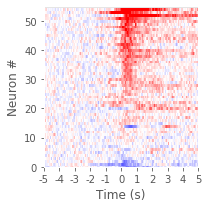

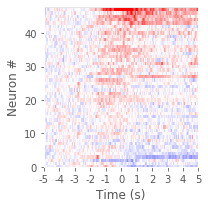

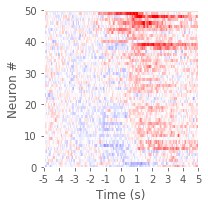

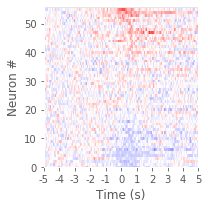

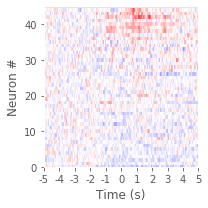

In [5]:
plt.rcParams['svg.fonttype'] = 'none'
[headheadfig, headheadsigids_positive, headheadsigids_negative] = sortplot_psthsummary(headheadzscore)
#headheadfig.savefig(savepath+savetype+'headhead_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[headtailfig, headtailsigids_positive, headtailsigids_negative] = sortplot_psthsummary(headtailzscore)
#headtailfig.savefig(savepath+savetype+'headtail_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[approachfig, approachsigids_positive, approachsigids_negative] = sortplot_psthsummary(approachzscore)
#approachfig.savefig(savepath+savetype+'approach_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[followingfig, followingsigids_positive, followingsigids_negative] = sortplot_psthsummary(followingzscore)
#followingfig.savefig(savepath+savetype+'following_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[conspecificfig, conspecificids_positive, conspecificids_negative] = sortplot_psthsummary(conspecificzscore)
#conspecificfig.savefig(savepath+savetype+'conspecific_zscore.svg', format = 'svg', dpi = 500, transparent = True)

In [6]:
allunits = len(psthresultssave[1:,4])
headhead_pos = np.count_nonzero(psthresultssave[1:,4] == 'sig+')
headhead_neg = np.count_nonzero(psthresultssave[1:,4] == 'sig-')
headhead_no = (allunits - headhead_pos - headhead_neg)/allunits
headtail_pos = np.count_nonzero(psthresultssave[1:,5] == 'sig+')
headtail_neg = np.count_nonzero(psthresultssave[1:,5] == 'sig-')
headtail_no = (allunits - headtail_pos - headtail_neg)/allunits
approach_pos = np.count_nonzero(psthresultssave[1:,6] == 'sig+')
approach_neg = np.count_nonzero(psthresultssave[1:,6] == 'sig-')
approach_no = (allunits - approach_pos - approach_neg)/allunits
following_pos = np.count_nonzero(psthresultssave[1:,7] == 'sig+')
following_neg = np.count_nonzero(psthresultssave[1:,7] == 'sig-')
following_no = (allunits - following_pos - following_neg)/allunits
conspecific_pos = np.count_nonzero(psthresultssave[1:,8] == 'sig+')
conspecific_neg = np.count_nonzero(psthresultssave[1:,8] == 'sig-')
conspecific_no = (allunits - conspecific_pos - conspecific_neg)/allunits

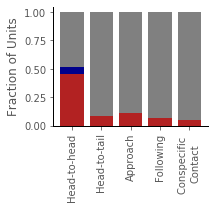

In [7]:
fig, ax = plt.subplots(1, figsize = (3,3))

ax.bar((0,1,2,3,4), (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'firebrick')
ax.bar((0,1,2,3,4), (headhead_neg/allunits, headtail_neg/allunits, approach_neg/allunits, following_neg/allunits, conspecific_neg/allunits), 
      bottom = (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'darkblue')
ax.bar((0,1,2,3,4), (headhead_no, headtail_no, approach_no, following_no, conspecific_no),
      bottom = (headhead_pos/allunits+headhead_neg/allunits, headtail_pos/allunits+headtail_neg/allunits, approach_pos/allunits+approach_neg/allunits, following_pos/allunits+following_neg/allunits, conspecific_pos/allunits+conspecific_neg/allunits), color = 'gray')

#ax.set_ylim(0,.3)
#ax.set_yticks((0, .1, .2, .3))
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(('Head-to-head', 'Head-to-tail', 'Approach', 'Following', 'Conspecific \nContact'), rotation = 90)
ax.set_ylabel('Fraction of Units')
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.grid(False)
plt.tight_layout()
#plt.savefig(savepath+'Summary_'+savetype+'.svg', format = 'svg', dpi = 500, transparent = True)

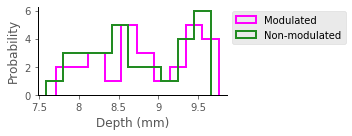

In [14]:
headheadmodulated = psthresultssave[psthresultssave[:,4] == 'sig+']
notheadheadmodulated = psthresultssave[psthresultssave[:,4] == 'no sig']

location = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_pyramidal/responseprofilewithlocation.csv', delimiter = ',', dtype = 'str')
location2 = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_interneuron/responseprofilewithlocation.csv', delimiter = ',', dtype = str)

location = np.vstack((location, location2))

ap_modulated = []
dv_modulated = []

ap_nonmodulated = []
dv_nonmodulated = []

for i, ii in enumerate(headheadmodulated):
    
    neuron = np.ravel(location[np.where((ii[0] == location[:,0]) & (ii[2] == location[:,2]))])
    ap_modulated = np.append(ap_modulated, np.float(neuron[-4]))
    dv_modulated = np.append(dv_modulated, np.float(neuron[-1]))
    
for j, jj in enumerate(notheadheadmodulated):
    
    neuron = np.ravel(location[np.where((jj[0] == location[:,0]) & (jj[2] == location[:,2]))])
    ap_nonmodulated = np.append(ap_nonmodulated, np.float(neuron[-4]))
    dv_nonmodulated = np.append(dv_nonmodulated, np.float(neuron[-1]))
    
fig, ax = plt.subplots(1, figsize = (5,2))

ax.hist(dv_modulated, histtype = 'step', color = 'magenta', lw = 2)
ax.hist(dv_nonmodulated, histtype = 'step', color = 'forestgreen', lw = 2)
ax.legend(('Modulated', 'Non-modulated'), bbox_to_anchor = (1,1))

ax.set_ylabel('Probability')
ax.set_xlabel('Depth (mm)')
ax.set_xticks((7500, 8000, 8500, 9000, 9500))
ax.set_xticklabels((7.5, 8, 8.5, 9, 9.5))

ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.tight_layout()
plt.grid(False)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure4/headhead_location.svg', format = 'svg', dpi = 500, transparent = True)
#plt.savefig(savepath+'/Headheadmodulated_location_all.png', dpi = 300)

In [48]:
row[-7]

'99D'

In [78]:
pancount_pos = 0
unicount_pos = 0
othercount_pos = 0

pancount_no = 0
unicount_no = 0
othercount_no = 0

pancount_neg = 0
unicount_neg = 0
othercount_neg = 0

for i, row in enumerate(psthresultssave[1:]):
    
    if np.count_nonzero(row[-5:] == 'sig+') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_pos = pancount_pos + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_pos = unicount_pos + 1
        else:
            othercount_pos = othercount_pos + 1
            
    elif np.count_nonzero(row[-5:] == 'sig-') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_neg = pancount_neg+1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_neg = unicount_neg + 1
        else:
            othercount_neg = othercount_neg + 1
            
    else:
        if row[-6] == 'panresponsive':
            pancount_no = pancount_no + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_no = unicount_no+1
        else:
            othercount_no = othercount_no+1
    

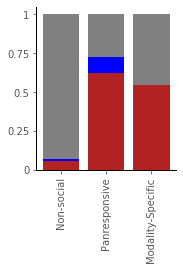

In [81]:
fig, ax = plt.subplots(1, figsize = (2.5, 3))

othertotal = othercount_pos+othercount_no+othercount_neg
pantotal = pancount_pos+pancount_no+pancount_neg
unitotal = unicount_pos+unicount_no+unicount_neg

ax.bar((0,1,2), (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal), color = 'firebrick')
ax.bar((0,1,2), (othercount_neg/othertotal, pancount_neg/pantotal, unicount_neg/unitotal), color = 'blue', bottom = (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal))

ax.bar((0,1,2), (othercount_no/othertotal, pancount_no/pantotal, unicount_no/unitotal), color = 'gray', bottom = ((othercount_pos+othercount_neg)/othertotal, (pancount_pos+pancount_neg)/pantotal, (unicount_pos+unicount_neg)/unitotal))

ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks((0,1,2))
ax.set_xticklabels(('Non-social', 'Panresponsive', 'Modality-Specific'), rotation = 90)

ax.set_yticks((0,.25,.5,.75,1))
ax.set_yticklabels((0,.25,.5,.75,1))

ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure4/summary_neurontype_specificbehaviors.svg', format = 'svg', dpi = 500, transparent = True)

In [57]:
pancount_neg = 0
unicount_neg = 0
othercount_neg = 0

pancount_no = 0
unicount_no = 0
othercount_no = 0

for i, row in enumerate(psthresultssave[1:]):
    
    if np.count_nonzero(row[-5:] == 'sig-') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_neg = pancount_neg + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_neg = unicount_neg + 1
        else:
            othercount_neg = othercount_neg + 1
            
    else:
        if row[-6] == 'panresponsive':
            pancount_no = pancount_no + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_no = unicount_no+1
        else:
            othercount_no = othercount_no+1
    

<BarContainer object of 3 artists>

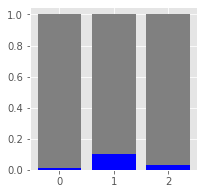

In [58]:
fig, ax = plt.subplots(1, figsize = (3, 3))

ax.bar((0,1,2), (othercount_neg/(othercount_neg+othercount_no), pancount_neg/(pancount_neg+pancount_no), unicount_neg/(unicount_neg+unicount_no)), color = 'blue')
ax.bar((0,1,2), (othercount_no/(othercount_neg+othercount_no), pancount_no/(pancount_neg+pancount_no), unicount_no/(unicount_neg+unicount_no)), bottom = (othercount_neg/(othercount_neg+othercount_no), pancount_neg/(pancount_neg+pancount_no), unicount_neg/(unicount_neg+unicount_no)), color = 'gray')

In [506]:
rocvalue = []
for i, row in enumerate(psthresultssave[1:]):
    rocvalue = np.append(rocvalue, socialbehavior[np.where((socialbehavior[:,1] == row[1]) & (socialbehavior[:,2] == row[2]))][-1][-1])

In [512]:
allsocialresults = np.hstack((psthresultssave[1:], rocvalue.reshape(len(rocvalue), 1)))

In [534]:
singlebehavior = np.zeros(10)
multiplebehaviors = np.zeros(10)
broadlysocial = np.zeros(10)
nolinkage = np.zeros(10)

for i, row in enumerate(allsocialresults):
    
    countresult = np.where((row[4:] == 'sig+') | (row[4:] == 'sig-'))[0]
    
    if len(countresult) == 1:
        singlebehavior = np.vstack((singlebehavior, row))
    elif len(countresult) > 1:
        multiplebehaviors = np.vstack((multiplebehaviors, row))
    else:
        if np.float(row[-1]) > .2:
            broadlysocial = np.vstack((broadlysocial, row))
        elif np.float(row[-1]) < -.2:
            broadlysocial = np.vstack((broadlysocial, row))
        else:
            nolinkage = np.vstack((nolinkage, row))
            
singlebehavior = singlebehavior[1:]
multiplebehaviors = multiplebehaviors[1:]
broadlysocial = broadlysocial[1:]
nolinkage = nolinkage[1:]

In [560]:
single_headhead = np.count_nonzero(singlebehavior[:,4] == 'sig+')
single_headtail = np.count_nonzero(singlebehavior[:,5] == 'sig+')
single_approach = np.count_nonzero(singlebehavior[:,6] == 'sig+')
single_following = np.count_nonzero(singlebehavior[:,7] == 'sig+')
single_conspecific = np.count_nonzero(singlebehavior[:,8] == 'sig+')

In [234]:
random = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior/'+neuronname+'_randaverage.csv', delimiter = ',', dtype = str)
actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
random = np.array(random[1:, 1:], np.float)
actual = np.array(actual[1:, 1:], np.float)

behaviorrange = np.arange(2, 12, 2)

neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]

for j, num in enumerate(behaviorrange):

    maxlimit = np.mean(actual[num])+np.std(actual[num])*2.5
    minlimit = np.mean(actual[num])-np.std(actual[num])*2.5

    if (maxlimit < 30) == True:
        save = np.hstack((rat, date[r], neuronname, neurontype, 'no response', behaviorlist[j], 'nan', 'nan'))
        results = np.vstack((results, save))
        continue

    [significance, pvalue] = stats.wilcoxon(random[num, 16:25], actual[num, 16:25])